In [6]:
import numpy as np
import torch

import matplotlib.pyplot as plt

In [25]:
a = 4
b = 5
c = 20

In [26]:
X = np.linspace(0, 1, 1000)
Y = c * X ** 2 + a * X + b + np.random.normal(0, 0.1, 1000)

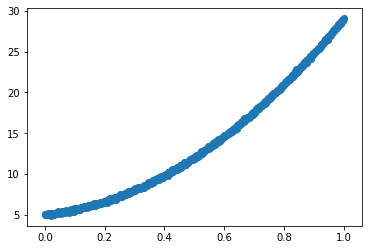

In [27]:
plt.scatter(X, Y)

In [28]:
X_train = torch.tensor(X, dtype=torch.float32)

In [30]:
Y_train = torch.tensor(Y, dtype=torch.float32)

In [105]:
a_1, b_1 = torch.tensor(0., requires_grad=True), torch.tensor(0., requires_grad=True),
c_1 = torch.tensor(0., requires_grad=True)

In [106]:
type(a_1)

torch.Tensor

In [107]:
y_pred = c_1 * X_train ** 2 + a_1 * X_train + b_1

In [108]:
def mse(y, x, a_1, b_1, c_1):
    y_pred = c_1 * x ** 2 + a_1 * x + b_1
    return ((y - y_pred) ** 2).mean()

In [109]:
loss = mse(Y_train, X_train, a_1, b_1, c_1)
loss.backward()

In [110]:
a_1.grad.data

tensor(-17.6749)

In [122]:
a_1.data = a_1.data + 1

In [123]:
a_1.grad.data

tensor(-17.3551)

array([801, 856, 651, 618, 889, 395,  21, 212, 299, 585, 294, 273, 869,
       549, 118, 400, 480, 476, 918, 799, 353, 952, 472, 534,  10, 420,
       824, 320, 528,  40, 904, 394, 791, 501, 969, 264, 222, 186, 389,
       193, 854, 739, 980, 715, 180, 245, 182, 316, 986, 547, 782, 200,
       689, 803, 768, 517, 830,  53, 513, 996,  20, 201, 119, 737])

In [211]:
def SGD(X_train, Y_train, a_1, b_1, c_1, lr=1e-3, n_iters=100, batch_size=64):
    for i in range(n_iters):
        batch_idx = np.random.choice(np.arange(0, len(X_train)), size=batch_size, replace=False)
        X_batch = X_train[batch_idx]
        Y_batch = Y_train[batch_idx]
        loss = mse(Y_batch, X_batch, a_1, b_1, c_1)
        loss.backward()

        a_1.data = a_1.data - a_1.grad.data * lr
        b_1.data = b_1.data - b_1.grad.data * lr
        c_1.data = c_1.data - c_1.grad.data * lr
        
        a_1.grad.data.zero_()
        b_1.grad.data.zero_()
        c_1.grad.data.zero_()
    return a_1, b_1, c_1

In [219]:
a_1, b_1 = torch.tensor(0., requires_grad=True), torch.tensor(0., requires_grad=True),
c_1 = torch.tensor(0., requires_grad=True)

In [220]:
a_1, b_1, c_1 = SGD(X_train, Y_train, a_1, b_1, c_1, lr=1e-2, n_iters=1000)

In [221]:
Y_pred = c_1 * X_train ** 2 + a_1 * X_train + b_1

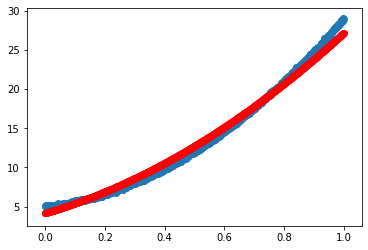

In [222]:
plt.scatter(X_train.data.numpy(), Y_train.data.numpy())
plt.scatter(X_train.data.numpy(), Y_pred.data.numpy(), c='r')
plt.show()

In [183]:
a_1_numpy = a_1.data.numpy()

In [184]:
a_1_numpy

array(4.170188, dtype=float32)